In [1]:
import matplotlib.pyplot as plt
import chess_stats as cs

In [9]:
df = cs.game_stats_df('bubbasparx666')

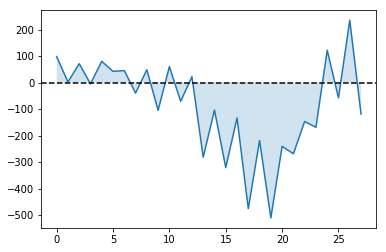

In [19]:
engine_path = '/Users/bmcgarry/projects/Stockfish/src/stockfish'
cs.move_evaluation(df.pgn[5], engine_path, evaluation_time=5, output='graph')

In [18]:
pgn_string = df.pgn[50]
pgn_string

'1. e4 {[%clk 0:15:09.9]} 1... e5 {[%clk 0:15:07.1]} 2. Nf3 {[%clk 0:15:18.6]} 2... Nc6 {[%clk 0:15:13.4]} 3. d3 {[%clk 0:15:18.1]} 3... Bb4+ {[%clk 0:15:14.8]} 4. c3 {[%clk 0:15:10.5]} 4... Bc5 {[%clk 0:15:03.7]} 5. b3 {[%clk 0:14:19.8]} 5... d6 {[%clk 0:14:58.2]} 6. a4 {[%clk 0:14:10.2]} 6... a5 {[%clk 0:14:52.4]} 7. Bg5 {[%clk 0:13:42.6]} 7... Nge7 {[%clk 0:14:33.7]} 8. Qd2 {[%clk 0:13:29.6]} 8... d5 {[%clk 0:14:14.9]} 9. b4 {[%clk 0:13:08]} 9... Bd6 {[%clk 0:13:31.2]} 10. exd5 {[%clk 0:13:09]} 10... Qd7 {[%clk 0:12:40.8]} 11. dxc6 {[%clk 0:13:08.4]} 11... bxc6 {[%clk 0:12:18.4]} 12. bxa5 {[%clk 0:12:27]} 12... Nd5 {[%clk 0:11:14.9]} 13. Na3 {[%clk 0:11:50.6]} 13... Rxa5 {[%clk 0:10:48.1]} 14. Nc4 {[%clk 0:11:43.7]} 14... Ra8 {[%clk 0:10:46.5]} 15. Nxd6+ {[%clk 0:11:49.4]} 15... cxd6 {[%clk 0:10:51.3]} 16. Be2 {[%clk 0:11:37.8]} 16... Qf5 {[%clk 0:10:08.7]} 17. c4 {[%clk 0:11:12.5]} 17... Nc7 {[%clk 0:09:54.1]} 18. d4 {[%clk 0:10:53.8]} 18... O-O {[%clk 0:09:41]} 19. dxe5 {[%clk 0:1

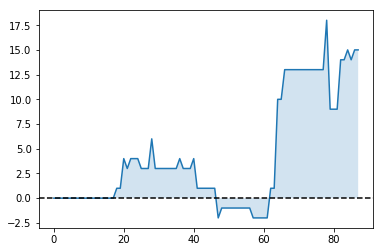

In [21]:
diff_score = cs.piece_count(pgn_string)[0]
fig, ax = plt.subplots()
x = list(range(len(diff_score)))
y = diff_score
ax.plot(x, y)
ax.fill_between(x, 0, y, alpha=0.2)
ax.axhline(0, ls='dashed', color='black');

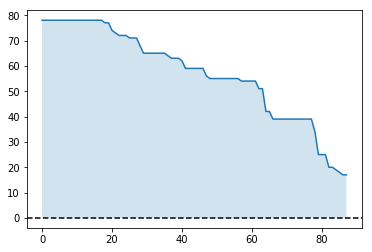

In [14]:
total_score = cs.piece_count(pgn_string)[1]
fig, ax = plt.subplots()
x = list(range(len(total_score)))
y = total_score
ax.plot(x, y)
ax.fill_between(x, 0, y, alpha=0.2)
ax.axhline(0, ls='dashed', color='black');

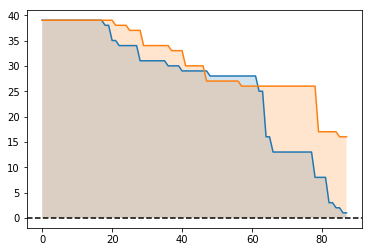

In [20]:
black_score = cs.piece_count(pgn_string)[2]
white_score = cs.piece_count(pgn_string)[3]
fig, ax = plt.subplots()
x = list(range(len(black_score)))
ax.plot(x, black_score)
ax.fill_between(x, 0, black_score, alpha=0.2)
ax.plot(x, white_score)
ax.fill_between(x, 0, white_score, alpha=0.2)
ax.axhline(0, ls='dashed', color='black');

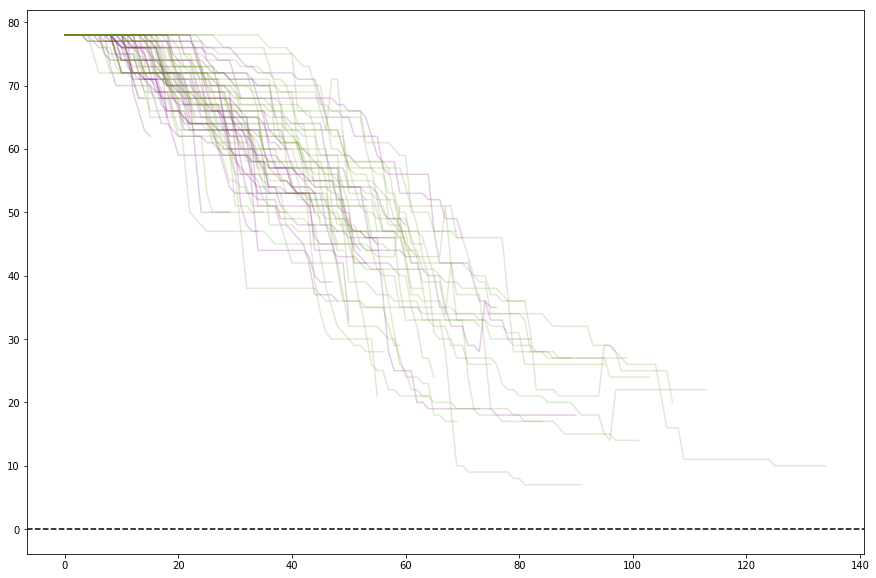

In [23]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.axhline(0, ls='dashed', color='black')

win_color_df = df[(df['player_color'] == 'white') & (df['win'] == True)]
lose_color_df = df[(df['player_color'] == 'white') & (df['lose'] == True)]

alpha = .2
kind = 1

win_games = win_color_df['pgn'].values
for game in win_games:
    if not game:
        continue
    score = cs.piece_count(game)
    x = list(range(len(score[kind])))
    y = score[kind]
    ax.plot(x, y, alpha=alpha, color='purple')

lose_games = lose_color_df['pgn'].values
for game in lose_games:
    if not game:
        continue
    score = cs.piece_count(game)
    x = list(range(len(score[kind])))
    y = score[kind]
    ax.plot(x, y, alpha=alpha, color='olivedrab')